In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
city_df = pd.read_csv(city_data_to_load)

city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
city_df.info()

city_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_df["type"]=="Urban")

66

In [11]:
sum(city_df["type"]=="Suburban")

36

In [12]:
sum(city_df["type"]=="Rural")

18

In [13]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [14]:
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#Combine the data 
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

#display new data fram
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create Urban data Frame
urban_df = pyber_df[pyber_df['type']=='Urban']
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Create Suburban data Frame
suburban_df = pyber_df[pyber_df['type']=='Suburban']
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
# Create Rural data Frame
rural_df = pyber_df[pyber_df['type']=='Rural']
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
#Get rider count by city for city type Urban
urban_ride_count = urban_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
#Get rider count by city for city type Suburban
suburban_ride_count = suburban_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
#Get rider count by city for city type Rural
rural_ride_count = rural_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [24]:
# Get avg fare for each city in city type urban
urban_avg_fare = urban_df.groupby(['city']).mean()['fare']
urban_avg_fare.head

<bound method NDFrame.head of city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64>

In [25]:
# Get avg fare for each city in city type suburban
suburban_avg_fare = suburban_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head

<bound method NDFrame.head of city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South

In [26]:
# Get avg fare for each city in city type rural
rural_avg_fare = rural_df.groupby(['city']).mean()['fare']
rural_avg_fare.head

<bound method NDFrame.head of city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64>

In [27]:
# Get avg number drivers for each city in city type urban
urban_avg_drivers = urban_df.groupby(['city']).mean()['driver_count']
urban_avg_drivers.head

<bound method NDFrame.head of city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64>

In [28]:
# Get avg number drivers for each city in city type suburban
suburban_avg_drivers = suburban_df.groupby(['city']).mean()['driver_count']
suburban_avg_drivers.head

<bound method NDFrame.head of city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville     

In [29]:
# Get avg number drivers for each city in city type =rural
rural_avg_drivers = rural_df.groupby(['city']).mean()['driver_count']
rural_avg_fare.head

<bound method NDFrame.head of city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64>

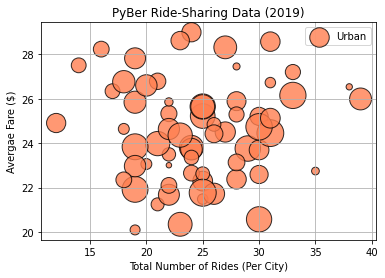

In [30]:
#build scatter plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_avg_drivers, 
            c="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

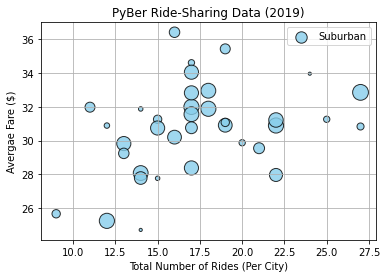

In [31]:
#build scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_avg_drivers, 
            c="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

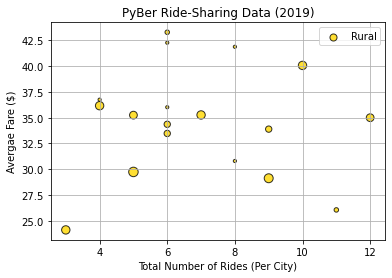

In [32]:
#build scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_avg_drivers, 
            c="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()
plt.show()

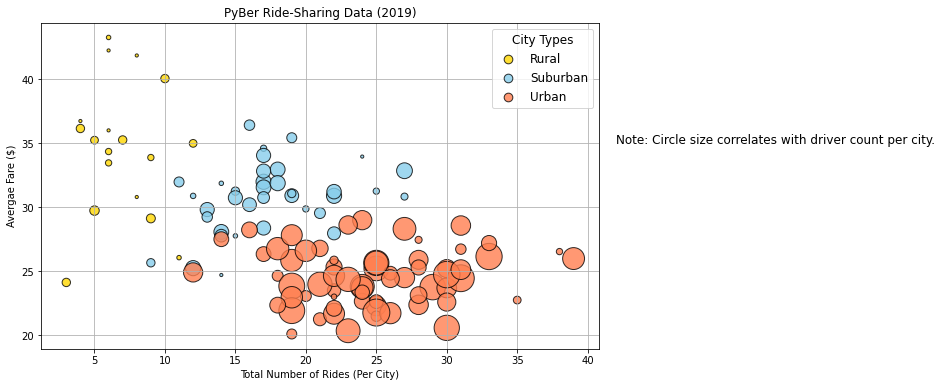

<Figure size 432x288 with 0 Axes>

In [33]:
#Combine the 3 scatter plots for each type of city
plt.subplots(figsize=(10, 6))
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_avg_drivers, 
            c="gold", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_avg_drivers, 
            c="skyblue", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Suburban")

#build scatter plot for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_avg_drivers, 
            c="coral", edgecolor="black", 
            linewidths=1, alpha=0.8, label="Urban")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avergae Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)

# Crete a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

# Save the figure.
plt.savefig("Analysis/Fig1.png")



In [34]:
# Get Summary stats
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [35]:
# Get Summary stats
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [36]:
# Get Summary stats
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [37]:
# Get Summary stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [38]:
# Get Summary stats
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [39]:
# Get Summary stats
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [40]:
#calculate mean of ride ocunt for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [41]:
#calculate median of ride ocunt for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [42]:
#calculate mode of ride ocunt for each city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [43]:
#import Numpy and stat module from SciPy
import numpy as np
import scipy.stats as sts

In [44]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [46]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [47]:
#Get fares for urban cities
urban_fares = urban_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
#Get fares for suburban cities
suburban_fares = suburban_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [49]:
#Get fares for rural cities
rural_fares = rural_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [50]:
# Calculate the measures of central tendency for fares for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean for the fares for urban trips is {mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median for the fares for urban trips is {median_urban_fares}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode for the fares for urban trips is {mode_urban_fares}.")

The mean for the fares for urban trips is 24.53.
The median for the fares for urban trips is 24.64.
The mode for the fares for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [51]:
# Calculate the measures of central tendency for fares for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean for the fares for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median for the fares for suburban trips is {median_suburban_fares}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode for the fares for suburban trips is {mode_suburban_fares}.")

The mean for the fares for suburban trips is 30.97.
The median for the fares for suburban trips is 30.75.
The mode for the fares for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [52]:
# Calculate the measures of central tendency for fares for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean for the fares for rural trips is {mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median for the fares for rural trips is {median_rural_fares}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode for the fares for rural trips is {mode_rural_fares}.")

The mean for the fares for rural trips is 34.62.
The median for the fares for rural trips is 37.05.
The mode for the fares for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [53]:
#get the driver count from urban cities
urban_drivers = urban_df['driver_count']
urban_drivers.head

<bound method NDFrame.head of 0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64>

In [54]:
#get the driver count from urban cities
suburban_drivers = suburban_df['driver_count']
suburban_drivers.head

<bound method NDFrame.head of 1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64>

In [55]:
#get the driver count from urban cities
rural_drivers = rural_df['driver_count']
rural_drivers.head

<bound method NDFrame.head of 2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64>

In [56]:
# Calculate the measures of central tendency for the driver count for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean for the drivers for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median for the drivers for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode for the driversfor urban trips is {mode_urban_drivers}.")

The mean for the drivers for urban trips is 36.68.
The median for the drivers for urban trips is 37.0.
The mode for the driversfor urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [57]:
# Calculate the measures of central tendency for the driver count for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the drivers for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the driversfor suburban trips is {mode_suburban_drivers}.")

The mean for the drivers for suburban trips is 13.71.
The median for the drivers for suburban trips is 16.0.
The mode for the driversfor suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [58]:
# Calculate the measures of central tendency for the driver count for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the drivers for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the driversfor rural trips is {mode_rural_drivers}.")

The mean for the drivers for rural trips is 4.30.
The median for the drivers for rural trips is 4.0.
The mode for the driversfor rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


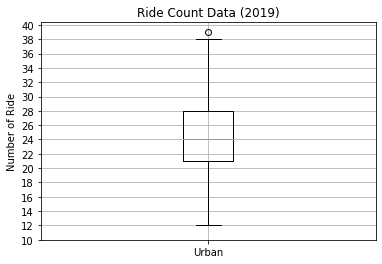

In [59]:
#Create box and whisker plot for urban cities ride count
x_labels =["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


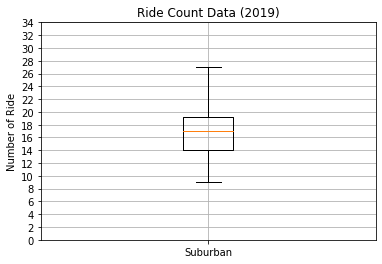

In [60]:
#Create box and whisker plot for suburban cities ride count
x_labels =["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(0, 36, step=2.0))
ax.grid()
plt.show()

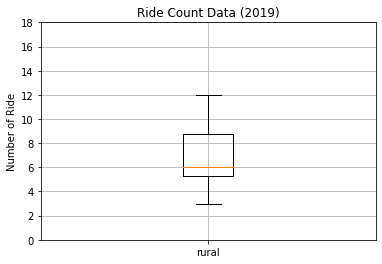

In [61]:
#Create box and whisker plot for rural cities ride count
x_labels =["rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.set_yticks(np.arange(0, 20, step=2.0))
ax.grid()
plt.show()

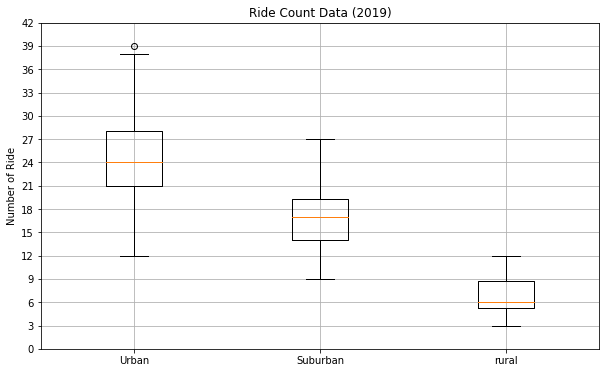

In [62]:
#Create box and whisker plot for rural cities ride count
x_labels =["Urban", "Suburban", "rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

#add title, y-axis label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Ride")
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [63]:
# Get the city that amtches the outlier 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


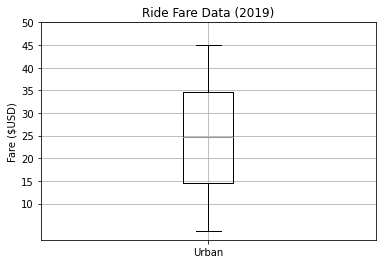

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [64]:
#Create box and whisker plot for urban cities fares
x_labels =["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


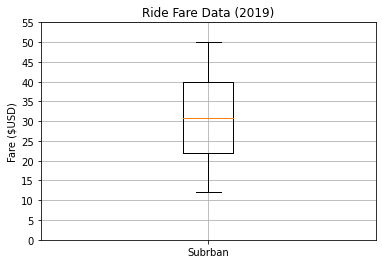

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [65]:
#Create box and whisker plot for suburban cities fares
x_labels =["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()


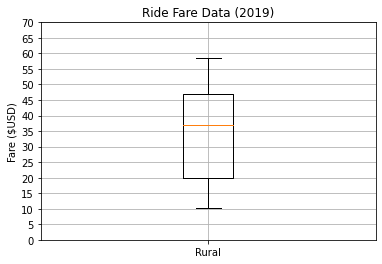

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [66]:
#Create box and whisker plot for rural cities fares
x_labels =["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

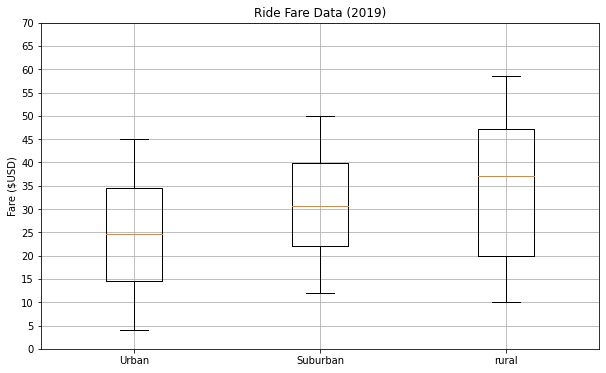

In [67]:
#Create box and whisker plot for combines cities fares
x_labels =["Urban", "Suburban", "rural"]

fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))

#add title, y-axis label, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

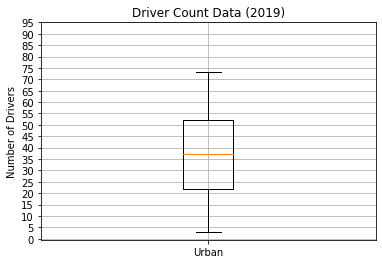

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [68]:
#Create the box and whisker plot for the urban driver count
x_labels =["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 100, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

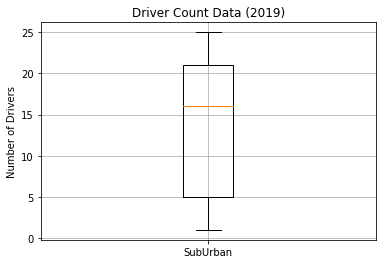

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [69]:
#Create the box and whisker plot for the urban driver count
x_labels =["SubUrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

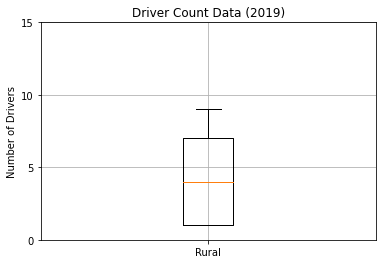

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [70]:
#Create the box and whisker plot for the urban driver count
x_labels =["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels = x_labels)

#add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 20, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

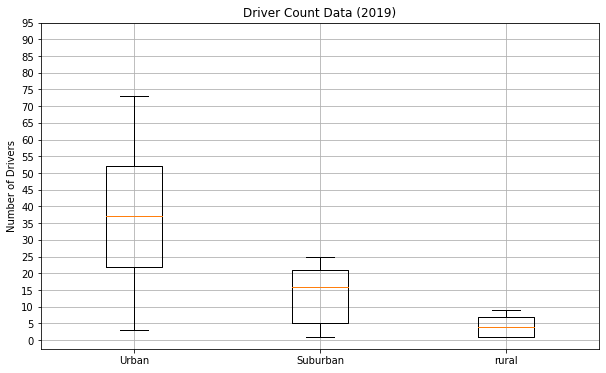

In [71]:
#Create box and whisker plot for combines cities fares
x_labels =["Urban", "Suburban", "rural"]

fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))

#add title, y-axis label, and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 100, step=5.0))
ax.grid()

# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [72]:
# sum of fares by city type
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type 

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [73]:
#sum of totla fares
total_fares = pyber_df["fare"].sum()
total_fares

63538.64

In [74]:
#calculate PCT of fare for each city
type_pct = 100 * sum_fares_by_type /total_fares
type_pct

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

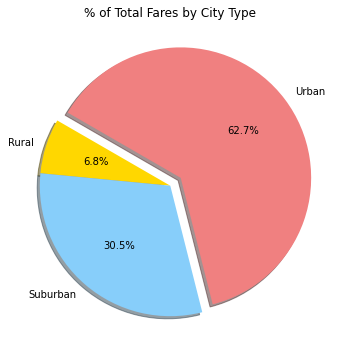

In [75]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

#build pie chart for pct of fares by city type
plt.subplots(figsize=(10, 6))
plt.pie(type_pct, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

plt.show()

In [76]:
# count of rides by city type
count_ride_by_type = pyber_df.groupby(["type"]).count()["ride_id"]
count_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [77]:
#countof total ride
total_ride = pyber_df["ride_id"].count()
total_ride

2375

In [78]:
#calculate PCT of fare for each city
ride_pct = 100 * count_ride_by_type /total_ride
ride_pct

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

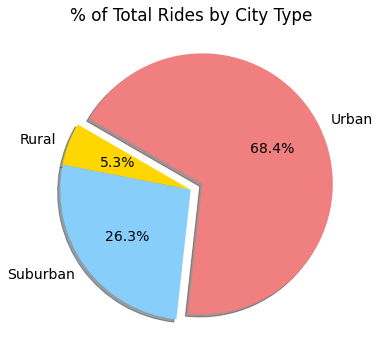

In [79]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

#build pie chart for pct of fares by city type
plt.subplots(figsize=(10, 6))
plt.pie(ride_pct, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig6.png")

plt.show()

In [80]:
# count of drivers by city type
count_drivers_by_type = city_df.groupby(["type"]).sum()["driver_count"]
count_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [81]:
#countof total ride
total_drivers = pyber_df["driver_count"].sum()
total_drivers

68709

In [82]:
#calculate PCT of fare for each city
driver_pct = 100 * count_drivers_by_type / total_drivers
driver_pct

type
Rural       0.113522
Suburban    0.713153
Urban       3.500269
Name: driver_count, dtype: float64

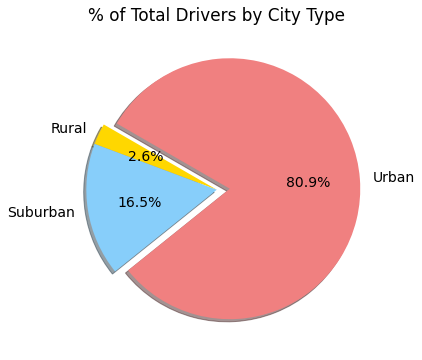

In [83]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl

#build pie chart for pct of fares by city type
plt.subplots(figsize=(10, 6))
plt.pie(driver_pct, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig7.png")

plt.show()